# Time Series Forecasting - Predicting BitCoin Price

In [ ]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install u8darts

In [ ]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-7f4f142e-1485-0ff7-468c-518f3f70509f)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
data = pd.read_csv('/content/Binance_BTCUSDT_d.csv')
data.head()

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
0,1727913600000,2024-10-03,BTCUSDT,60649.27,61477.19,59828.11,60752.71,26221.43472,1.590774e+09,5244004
1,1727827200000,2024-10-02,BTCUSDT,60804.92,62390.31,60000.00,60649.28,31534.70118,1.928378e+09,5313210
2,1727740800000,2024-10-01,BTCUSDT,63327.60,64130.63,60164.00,60805.78,43671.48108,2.723672e+09,5607069
3,1727654400000,2024-09-30,BTCUSDT,65602.01,65618.80,62856.30,63327.59,30011.08752,1.920250e+09,3978584
4,1727568000000,2024-09-29,BTCUSDT,65858.00,66076.12,65432.00,65602.01,8337.74111,5.479800e+08,1413449


In [ ]:
len(data)

2605

In [ ]:
data.tail()

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
2600,1503273600000,2017-08-21,BTCUSDT,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972
2601,1503187200000,2017-08-20,BTCUSDT,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321
2602,1503100800000,2017-08-19,BTCUSDT,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153
2603,1503014400000,2017-08-18,BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233
2604,1502928000000,2017-08-17,BTCUSDT,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427


In [ ]:
bitcoin_data = data.iloc[::-1]
bitcoin_data.head()

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
2604,1502928000000,2017-08-17,BTCUSDT,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427
2603,1503014400000,2017-08-18,BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233
2602,1503100800000,2017-08-19,BTCUSDT,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153
2601,1503187200000,2017-08-20,BTCUSDT,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321
2600,1503273600000,2017-08-21,BTCUSDT,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972


# 1 Preparing the dataframe

In [ ]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2605 entries, 2604 to 0
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unix         2605 non-null   int64  
 1   Date         2605 non-null   object 
 2   Symbol       2605 non-null   object 
 3   Open         2605 non-null   float64
 4   High         2605 non-null   float64
 5   Low          2605 non-null   float64
 6   Close        2605 non-null   float64
 7   Volume BTC   2605 non-null   float64
 8   Volume USDT  2605 non-null   float64
 9   tradecount   2605 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 203.6+ KB


In [ ]:
# let's convert the Date column to datetype and make it as the index
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data = bitcoin_data.set_index('Date')
bitcoin_data.head()

,Unix,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
Date,,,,,,,,,
2017-08-17,1502928000000,BTCUSDT,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427
2017-08-18,1503014400000,BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233
2017-08-19,1503100800000,BTCUSDT,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153
2017-08-20,1503187200000,BTCUSDT,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321
2017-08-21,1503273600000,BTCUSDT,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972


In [ ]:
bitcoin_prices = pd.DataFrame(bitcoin_data['Close'])
bitcoin_prices.head()

,Close
Date,
2017-08-17,4285.08
2017-08-18,4108.37
2017-08-19,4139.98
2017-08-20,4086.29
2017-08-21,4016.00


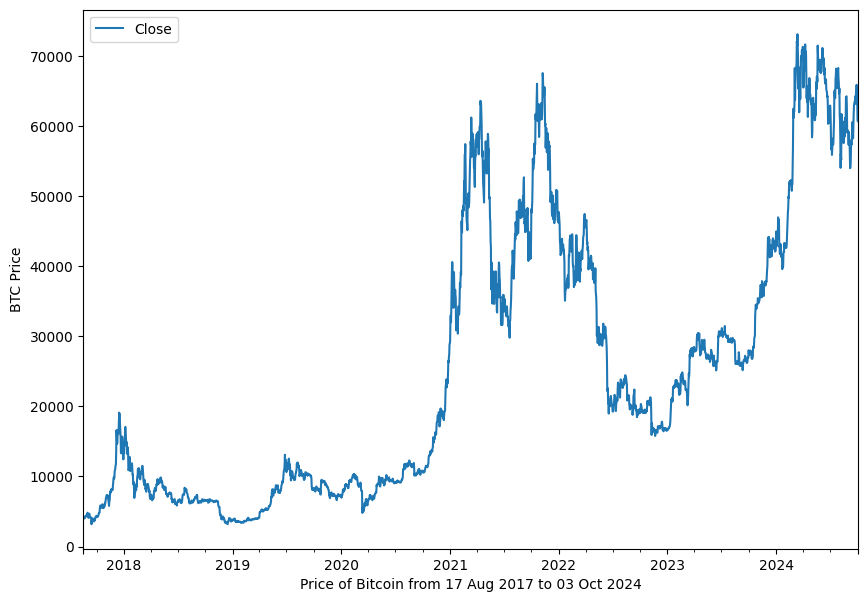

In [ ]:
# let's plot our data
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel('BTC Price')
plt.xlabel('Price of Bitcoin from 17 Aug 2017 to 03 Oct 2024')
plt.show()

# 2 Create Train Test Splits

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
bitcoin_prices = bitcoin_prices['Close'].to_numpy()
len(timesteps), len(bitcoin_prices)

(2605, 2605)

In [ ]:
split_size = int(0.8 * len(timesteps))
split_size

2084

In [ ]:
X_train, y_train = timesteps[:split_size], bitcoin_prices[:split_size]
X_test, y_test = timesteps[split_size:], bitcoin_prices[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2084, 2084, 521, 521)

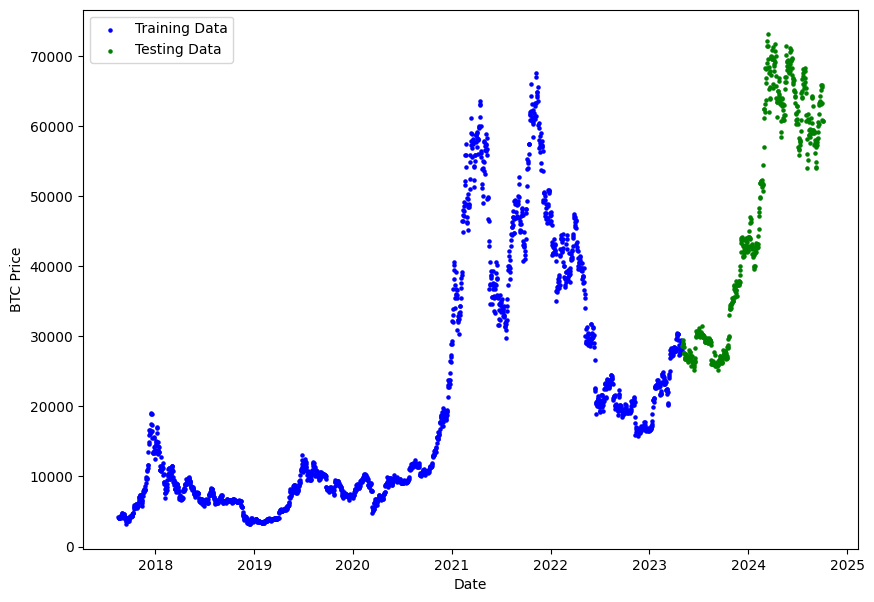

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train,s=5, c='b', label='Training Data')
plt.scatter(X_test, y_test,s=5, c='g', label='Testing Data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend()

In [ ]:
# plotting function for future
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)


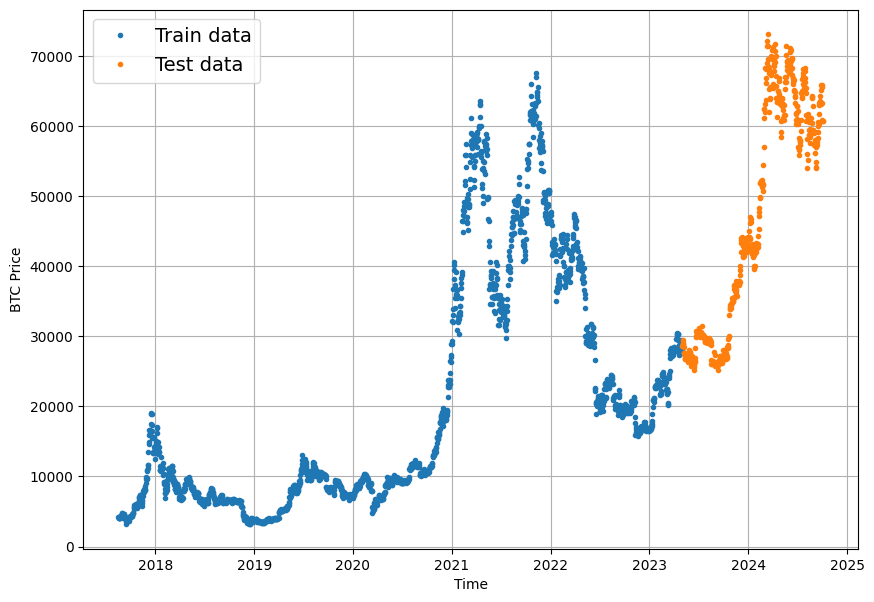

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# 3 Experimenting with Models

## 3.1 Naive Model (Baseline)

In [ ]:
forecast0 = y_test[:-1]
forecast0[:10]

array([28669.86, 29026.16, 28838.16, 29505.61, 28848.2 , 28430.1 ,
       27668.79, 27628.27, 27598.75, 26968.62])

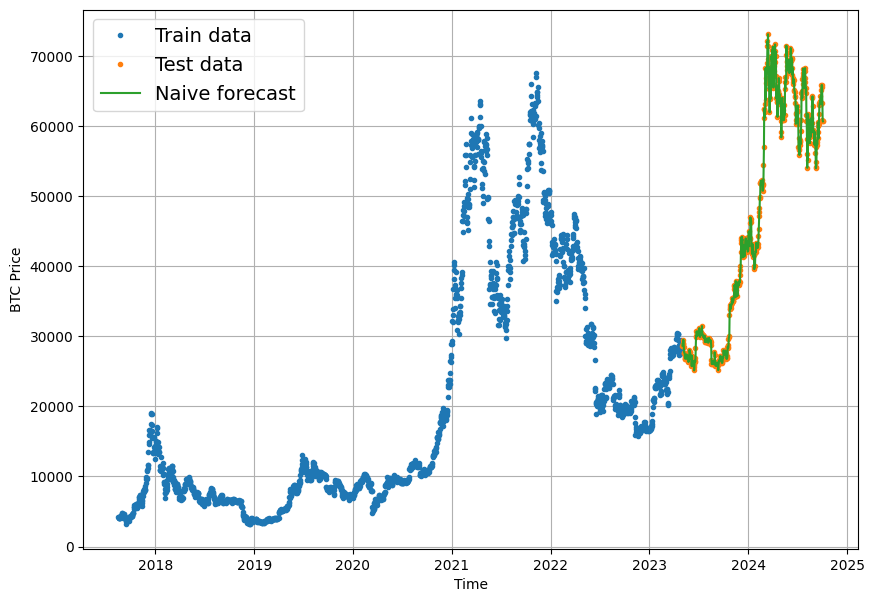

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=forecast0, format="-", label="Naive forecast");

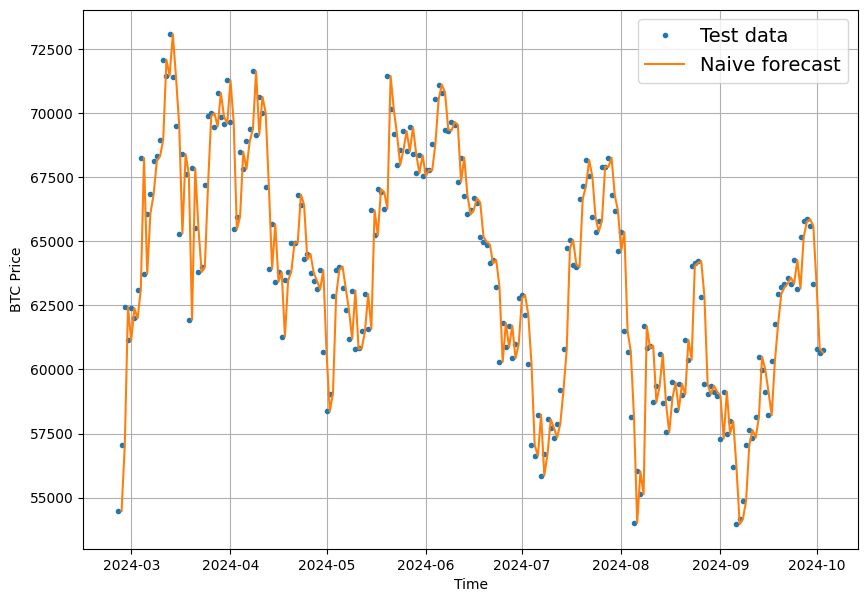

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=forecast0, format="-", start=offset, label="Naive forecast");

Let's evaluate

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.losses.MAE(y_true, y_pred)
  mse = tf.keras.losses.MSE(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.losses.MAPE(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=forecast0)
naive_results

{'mae': 858.908,
 'mse': 1760665.9,
 'rmse': 1326.9009,
 'mape': 1.7169135,
 'mase': 0.9988737}

## 3.2 Exponential Smoothing

In [ ]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing

In [ ]:
# Convert your training and testing data to Darts TimeSeries
series = TimeSeries.from_dataframe(pd.DataFrame({'Date': timesteps, 'Value': bitcoin_prices}), time_col='Date', value_cols='Value')
series

<TimeSeries (DataArray) (Date: 2605, component: 1, sample: 1)> Size: 21kB
array([[[ 4285.08]],

       [[ 4108.37]],

       [[ 4139.98]],

       ...,

       [[60805.78]],

       [[60649.28]],

       [[60752.71]]])
Coordinates:
  * Date       (Date) datetime64[ns] 21kB 2017-08-17 2017-08-18 ... 2024-10-03
  * component  (component) object 8B 'Value'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
# Define the starting point for the test data
test_start_date = pd.Timestamp('2023-05-02')
test_start_idx = series.time_index.get_loc(test_start_date)

In [ ]:
# Parameters for cross-validation
forecast_horizon = 1  # 1 day forecast
validation_windows = []

# Perform cross-validation
start_idx = test_start_idx
while start_idx < len(series):
    end_idx = min(start_idx + forecast_horizon, len(series))
    train_series = series[:start_idx]
    model = ExponentialSmoothing()
    model.fit(train_series)

    forecast_length = end_idx - start_idx
    forecast = model.predict(forecast_length)
    validation_windows.append(forecast)

    start_idx += forecast_horizon

In [ ]:
# Combine all the forecasts into a single TimeSeries
combined_forecast = validation_windows[0]
for forecast in validation_windows[1:]:
    combined_forecast = combined_forecast.append(forecast)

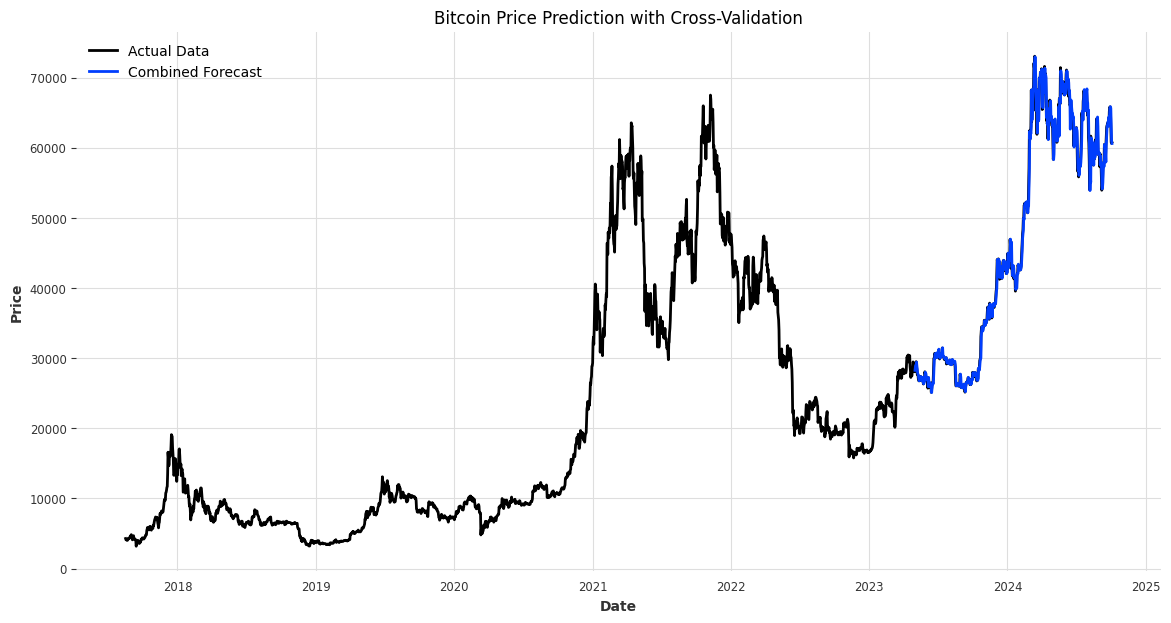

In [ ]:
# Plot the results
plt.figure(figsize=(14, 7))
series.plot(label='Actual Data', lw=2)
combined_forecast.plot(label='Combined Forecast', lw=2)
plt.title('Bitcoin Price Prediction with Cross-Validation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
combined_forecast_values = combined_forecast.values().flatten().astype(np.float32)

In [ ]:
ES_results = evaluate_preds(y_true=y_test, y_pred=combined_forecast_values)
ES_results

{'mae': 869.7958,
 'mse': 1842781.0,
 'rmse': 1357.4907,
 'mape': 1.7346842,
 'mase': 1.0126762}

## 3.3 AutoARIMA

In [ ]:
from darts.models import AutoARIMA

In [ ]:
# Parameters for cross-validation
forecast_horizon = 30
validation_windows = []

# Perform cross-validation
start_idx = test_start_idx
while start_idx < len(series):
    end_idx = min(start_idx + forecast_horizon, len(series))
    train_series = series[:start_idx]
    model = AutoARIMA()
    model.fit(train_series)

    forecast_length = end_idx - start_idx
    forecast = model.predict(forecast_length)
    validation_windows.append(forecast)

    start_idx += forecast_horizon

In [ ]:
# Combine all the forecasts into a single TimeSeries
combined_forecast = validation_windows[0]
for forecast in validation_windows[1:]:
    combined_forecast = combined_forecast.append(forecast)

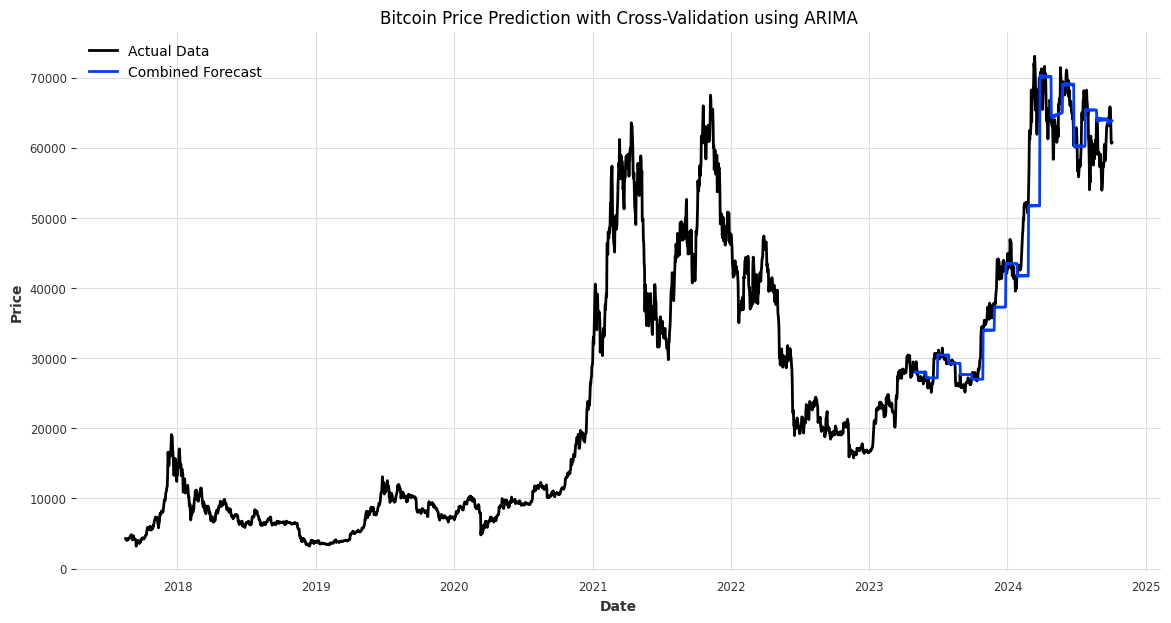

In [ ]:
# Plot the results
plt.figure(figsize=(14, 7))
series.plot(label='Actual Data', lw=2)
combined_forecast.plot(label='Combined Forecast', lw=2)
plt.title('Bitcoin Price Prediction with Cross-Validation using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
combined_forecast_values = combined_forecast.values().flatten().astype(np.float32)

In [ ]:
ARIMA_results = evaluate_preds(y_true=y_test, y_pred=combined_forecast_values)
ARIMA_results

{'mae': 3364.1926,
 'mse': 25689692.0,
 'rmse': 5068.5,
 'mape': 6.7582207,
 'mase': 3.9168253}

## **Let's try some deep learning models**

### 3.4 LSTM

### **Let's format our data into windows and horizons**

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create a function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  """
  Create labels for windowed dataset
  E.g if horizon = 1
  Input: [0, 1,  2, 3, 4, 5, 6, 7] -> Output: ([0, 1,  2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon]

In [ ]:
# Test our window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


In [ ]:
# Create a function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size label.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of window size

  print(f"Window indexex:\n {window_indexes, window_indexes.shape}")

In [ ]:
make_windows(bitcoin_prices, window_size=WINDOW_SIZE, horizon=HORIZON)

Window indexex:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2595, 2596, 2597, ..., 2600, 2601, 2602],
       [2596, 2597, 2598, ..., 2601, 2602, 2603],
       [2597, 2598, 2599, ..., 2602, 2603, 2604]]), (2598, 8))


In [ ]:
# Create a function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size label.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of window size
  print(f"Window indexex:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array with 2D array of multiple window sets
  windowed_array = x[window_indexes]

  #4. Get the labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(bitcoin_prices, window_size=WINDOW_SIZE, horizon=HORIZON)

Window indexex:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2595, 2596, 2597, ..., 2600, 2601, 2602],
       [2596, 2597, 2598, ..., 2601, 2602, 2603],
       [2597, 2598, 2599, ..., 2602, 2603, 2604]]), (2598, 8))


In [ ]:
# View the first 3 windows & labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [4285.08 4108.37 4139.98 4086.29 4016.   4040.   4114.01] -> Label: 4316.01
Window: [4108.37 4139.98 4086.29 4016.   4040.   4114.01 4316.01] -> Label: 4280.68
Window: [4139.98 4086.29 4016.   4040.   4114.01 4316.01 4280.68] -> Label: 4337.44


In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels


In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2078, 520, 2078, 520)

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [ ]:
print(tf.constant(train_windows[0]))

tf.Tensor([4285.08 4108.37 4139.98 4086.29 4016.   4040.   4114.01], shape=(7,), dtype=float64)


In [ ]:
tf.random.set_seed(42)
import keras
from keras import layers


# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(tf.constant(train_windows[0]).shape))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
lstm_model = tf.keras.Model(inputs=inputs, outputs=output, name="lstm.keras")

# Compile model
lstm_model.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
lstm_model.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=lstm_model.name)])

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions with our LSTM model
lstm_preds = make_preds(lstm_model, test_windows)
lstm_preds[:10]

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([28371.297, 28797.912, 28774.957, 29205.525, 29150.994, 28575.99 ,
       27911.182, 27570.703, 27411.133, 27037.604], dtype=float32)>

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.losses.MAE(y_true, y_pred)
  mse = tf.keras.losses.MSE(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.losses.MAPE(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Evaluate model 5 preds
lstm_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=lstm_preds)
lstm_results

{'mae': 906.01935,
 'mse': 1895065.0,
 'rmse': 1376.6135,
 'mape': 1.8254793,
 'mase': 1.0536622}

### 3.5 Conv1D

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[4285.08]
 [4108.37]
 [4139.98]
 [4086.29]
 [4016.  ]
 [4040.  ]
 [4114.01]]


In [ ]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D.keras")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:

# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13710.558, 13819.847, 13815.21 , 13901.896, 13892.612, 13737.973,
       13561.962, 13440.812, 13360.485, 13233.75 ], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 24360.203,
 'mse': 666612600.0,
 'rmse': 25818.842,
 'mape': 52.317856,
 'mase': 28.329887}